### Propensity To Convert Models - Predicting the the likelihood of Customer accepting Personal Loan Offer ###

### Introduction ###
Banks spend millions of dollars on marketing teams and the campaigns in targeting right customer, right channel where the response rate is higher when offer is made. Based on various studies made and the observation I have at my work, the response rate is very low, response rate is below 5% in personal loans space. The low acceptance rate means that randomly choosing customers to market to is incredibly wasteful in terms of both time and money. Thus, it is in the interest of the banks to determine which customers are the most likely to accept this type of loan based on the customer's information. Also the creatives that are being sent are looked at being more personalized so that message in the offer resonates with their situation and make the customers to accept the rate.
For my project, I am focusing only the persona/customer segmentation. Creative design and propensity rate of each creative is something would be further investigated outside of this work.  For this project, I am aiming to apply the K-Means, Support Vector Machine, Logistic Regression, Perceptron, and Multi-layer Perceptron algorithms to predict whether customers will be willing to take on a personal loan. The input into our algorithms will be a customer's age, years of professional experience, annual income measured in thousands of dollars, home address, ZIP code, family size, average spending on credit cards per month measured in thousands, education level, and the value of a house mortgage (if the customer has any). Our algorithm will use this information to output a prediction on whether a customer will take a personal loan (1) or not (0).

In practice, marketing teams can optimize their spend on campaigns by targeting these customers who are likely to accept the offer.
Project Plan. I will be working on the term project individually as my work schedules are pretty tight for group project at this point. I have created high level plan with all the critical tasks and aiming to use that to track the progress and keep myself focused. For peer reviews, I will be partnering with Victoria Hall for each milestone throughout the entirety of the course. I have chosen the dataset and since I am in same domain so hoping I could leverage my domain experience to understand the problem and features better. The dataset is small and I wish if I could get better volumed dataset with at least 100K observations. I would continue to explore and merge the datasets if I found any better.

### Dataset and Features ###
I am choosing the dataset from Kaggle as titled "Personal Loan Modeling" . It contains a list of 5000 bank customer's data resulting from a marketing campaign. For each customer, there are 12 features and a [0,1] label of whether they accepted a personal loan offered in the bank's marketing campaign. The specific features for each customer are described in detail below:
id : Customer ID

### Modeling Methodology ###
For this project, as of now I am aiming to apply the K-Means, Support Vector Machine, Logistic Regression, Perceptron, and Multi-layer Perceptron algorithms to predict whether customers will be willing to take on a personal loan or not. On the model evaluation, I plan to calculate the accuracy, precision, recall and F1 score as well as visualize a confusion matrix and an ROC, AUC curve. I am also interested to explore the use of confidence intervals as thats what I have been hearing at my work but I am yet to understand how to apply them to this problem.

### Risks / Contingencies ### 
Since the dataset is small and simulated dataset, it is highly possible that few models may perform poorly on the data hence as a contingency plan, I have aimed to apply multiple models and compare the results but still results may not be aligned with real world scenario but I take this opportunity in validating my understanding with end to end flow of applying predictive analytics to a problem. 
In general such datasets would be imbalanced so I am keeping closed tab on sampling (under/over) and also hyper parameter tuning because it could help the algorithms distinguish the majority class from the minority data group in our dataset.

In [1]:
###Imprort Libraries
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

In [2]:
loan_df = pd.read_csv('C:/Users/Supraja/Desktop/Supraja WORK Apps/7.DSC630/Term Project/Bank_Personal_Loan_Modelling.csv')
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the attributes are numerical. 

In [4]:
loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Personal loan is target variable.Securities Account,CD_account,online,Credit card are all categorical variables. Lets convert those into categorical variables

ID attribute denotes record number so it is not adding value to the dataset hence it can be dropped.

In [5]:
#taking a copy before dropping the attribute
df_loan=loan_df.copy()

#droping id
loan_df.drop(['ID'],axis=1,inplace=True)

In [6]:
loan_df.columns.tolist()

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

Few of the attribute having space in the name so lets clean them up and have them as one word.

In [7]:
loan_df.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [8]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education']
loan_df[category_col] = loan_df[category_col].astype('category')

In [9]:
loan_df.ZIPCode.nunique()

467

We have data for 467 neighborhoods so there could be some pattern we could expect to see. Lets analyse that later part of the analysis.

In [10]:
loan_df.groupby(['ZIPCode','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size   
PersonalLoan    0  1
ZIPCode             
9307            1  0
90005           5  0
90007           6  0
90009           8  0
90011           3  0
...           ... ..
96091           4  0
96094           2  0
96145           1  0
96150           4  0
96651           6  0

[467 rows x 2 columns]

Its not leading to any significant observations. Perhaps converting zipcodes to county or region perhaps could give some understanding if the
neighborhood is playing any role in loan acceptance. I will reserve ths analysis for this in next milestone.

While navigating the dataset, found few negative values in numerical attributes, lets understand what they mean

In [11]:
# checking negative and zero values for experience. 
loan_df[loan_df['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

52 customers from age group 23 (min) - 30(max) have negative values in experience

In [12]:
loan_df.groupby(['Age','Education'])['Experience'].describe().T

Age              23                   24                       25             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26            ...         64         65  \
Education          3          1         2  ...          3          1   
count      19.000000  30.000000  24.00000  ...  30.000000  30.000000   
mean       -0.526316   1.433333   0.75000  ...  38.533333  39.866667   
std         0.696692   0.817200   0.84699  ...   1.756433   0.730297   
min        -2.000000   0.000000  -1.00000  ...  34.000000  39.000000   
25%        -1.000000   1.000000   0.00000  ...  38.000000  39.000000   
50%        -1.000000   2.000000   1.00000  ...  39.000000  40.000000   
75%         0.000000   2.000000   1.00000  ...  40.000000  40.000000   
max         1.000000   2.000000   2.00000  ...  40.000000  41.000000   

Age                                     66                               67  \
Education          2          3          1          2          3          1   
count      23.000000  27.000000   9.000000   5.000000  10.000000   5.000000   
mean       40.086957  39.518519  41.111111  41.400000  40.400000  41.600000   
std         0.733178   1.553417   0.333333   0.547723   1.646545   0.894427   
min        39.000000  35.000000  41.000000  41.000000  36.000000  41.000000   
25%        40.000000  39.000000  41.000000  41.000000  40.250000  41.000000   
50%        40.000000  40.000000  41.000000  41.000000  41.000000  41.000000   
75%        41.000000  41.000000  41.000000  42.000000  41.000000  42.000000   
max        41.000000  41.000000  42.000000  42.000000  42.000000  43.000000   

Age                             
Education          2         3  
count       3.000000   4.00000  
mean       42.666667  41.50000  
std         0.577350   0.57735  
min        42.000000  41.00000  
25%        42.500000  41.00000  
50%        43.000000  41.50000  
75%        43.000000  42.00000  
max        43.000000  42.00000  

[8 rows x 134 columns]

Its seems experience is negative for all observation with for age 23,24, and few others . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [13]:
loan_df.loc[loan_df['Experience']<0,'Experience']=np.abs(loan_df['Experience'])

In [14]:
# checking negative and zero values for experience. 
loan_df[loan_df['Experience']<0]['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

In [15]:
loan_df[loan_df['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

There are significant number of records with in age of 23, 24 are having 0 in experience. They could be genuine as well. Lets see how to handle these later

### Exploratory Data Analysis ###

In [16]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


### Observations

Customers age is in range of 23 - 67, with mean and median of ~45.

Maximum experience is 43 years. where as mean and median are ~20.

Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD. Need to check for outliers if any.

Maximum mortgage taken is 635k USD. Need to check for outliers if any

Average spending on credit card per month ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD

#### Age
Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern

In [17]:
loan_df['Agebin'] = pd.cut(loan_df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

#### Income
To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [18]:
# Create a new variable - Income group

loan_df["Income_group"] = pd.cut(
    x=loan_df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

#### Spending
To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [19]:
loan_df["Spending_group"] = pd.cut( x=loan_df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

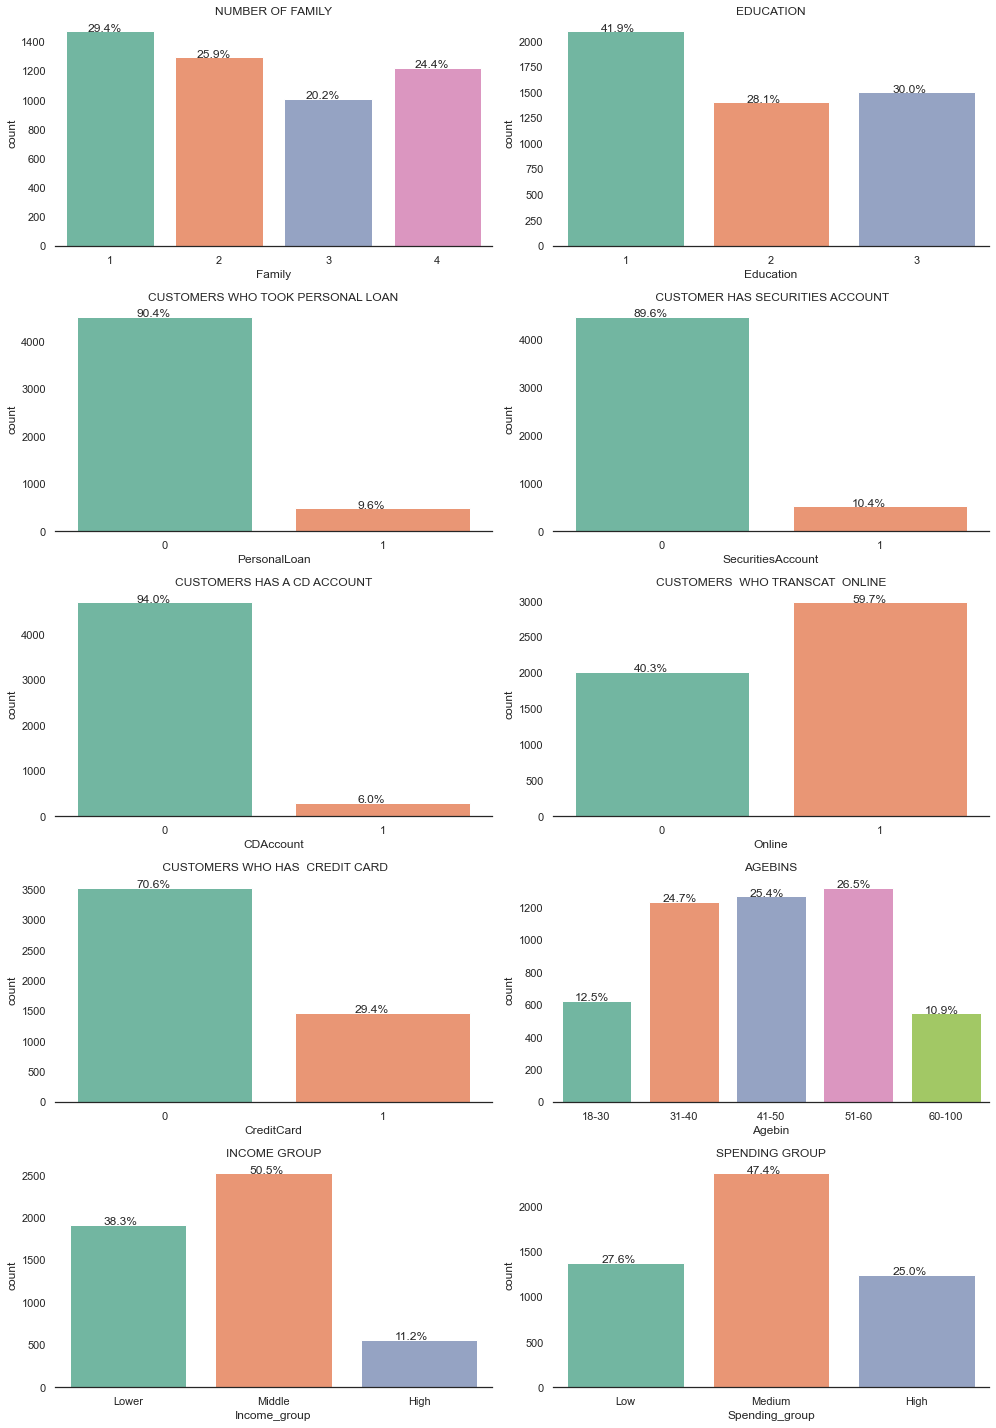

In [20]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = loan_df[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=loan_df[variable], data=loan_df )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(loan_df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

### Observations

~29.4 % customers are single.

~41.9% customers are undergrad.

~9.6% bought a personal loan from the bank.

10.4 % customers have a securities account with the bank

6 % customer have a CD account.

60% customers transact online.

29.4% customers have credit cards.

~ 75 % of customers are in range of 31- 60.

~ 50 % Most of bank customers belong to middle income group.

~48 % of customers has medium Average spending

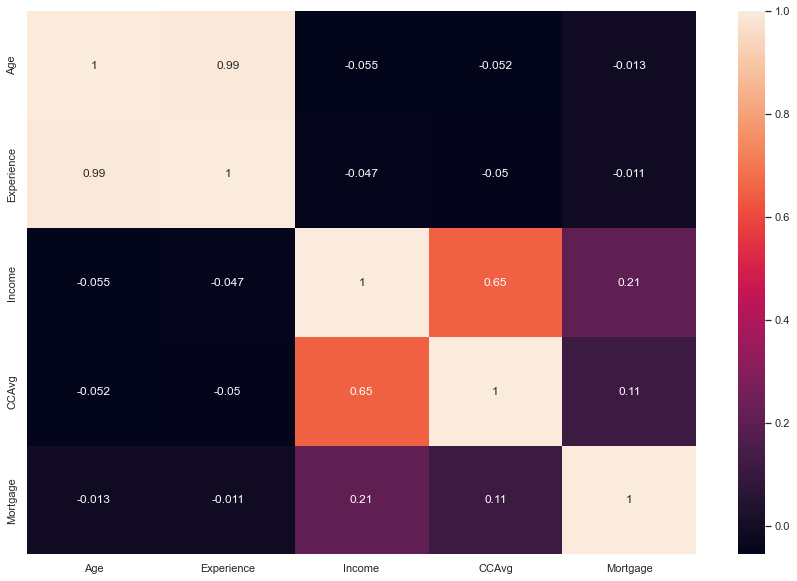

In [21]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

### Observations

As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.

Income and Average spending on credit card are positively corrleated.

Mortgage has very little correlation with income.

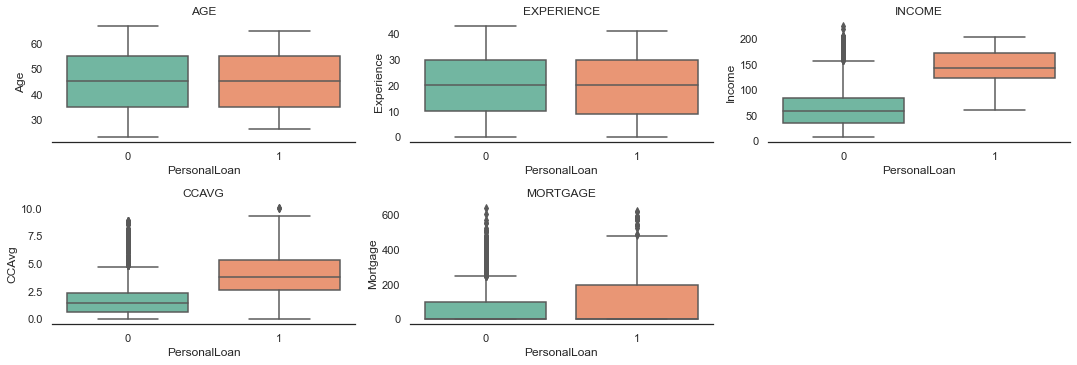

In [22]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= loan_df[variable], data=loan_df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


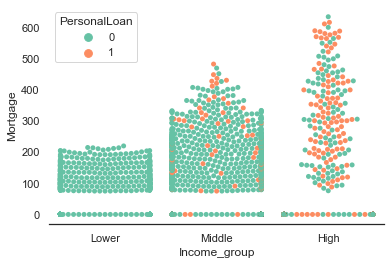

In [23]:
sns.swarmplot(x='Income_group',y='Mortgage',hue='PersonalLoan',data=loan_df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


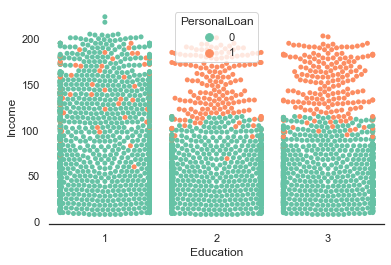

In [24]:
sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=loan_df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

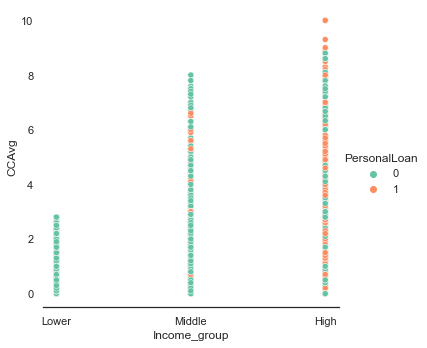

In [25]:
sns.relplot(x='Income_group',y='CCAvg',hue='PersonalLoan',data=loan_df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [26]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,loan_df['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan_df['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1088  134  1222
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


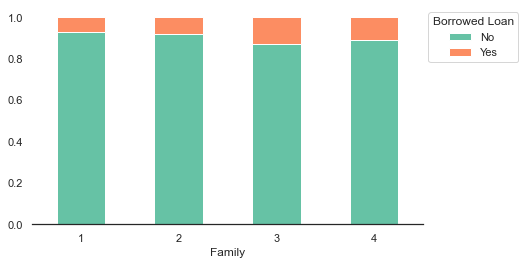

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1296  205  1501
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


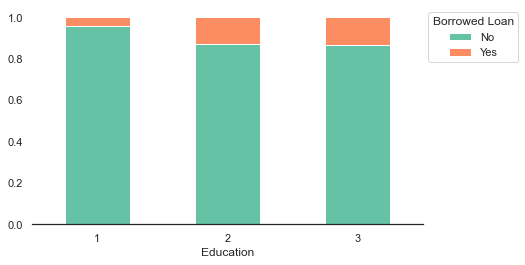

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4058  420  4478
1                   462   60   522
All                4520  480  5000
------------------------------------------------------------------------------------------------------------------------


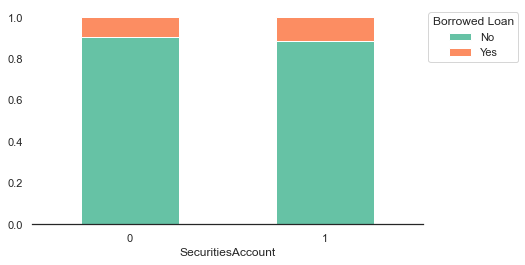

PersonalLoan     0    1   All
CDAccount                    
0             4358  340  4698
1              162  140   302
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


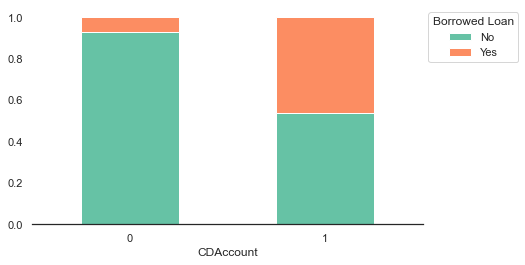

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1327  143  1470
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


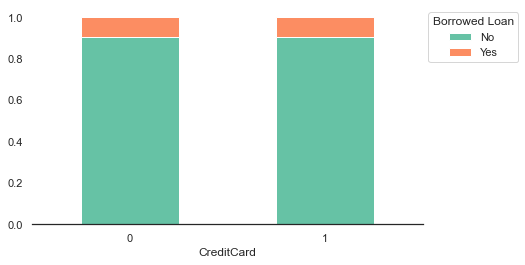

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2693  291  2984
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


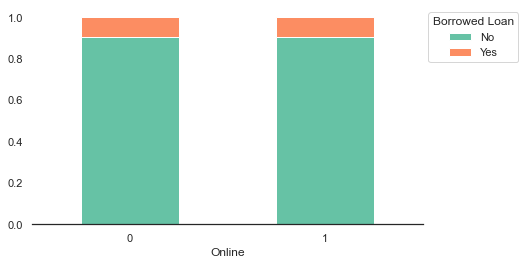

PersonalLoan     0    1   All
Agebin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1208  115  1323
60-100         488   59   547
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


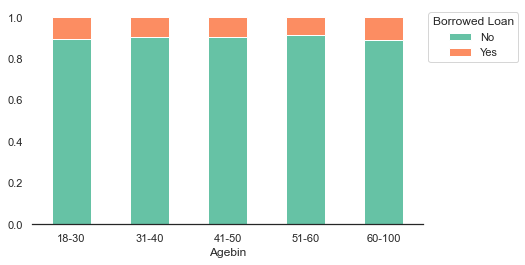

PersonalLoan     0    1   All
Income_group                 
Lower         1914    0  1914
Middle        2301  223  2524
High           305  257   562
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


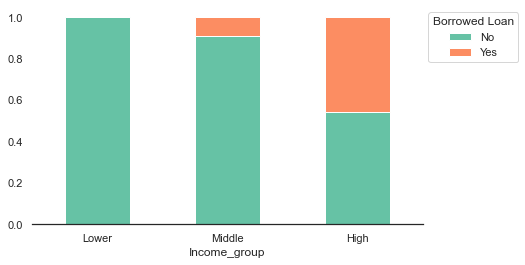

PersonalLoan       0    1   All
Spending_group                 
Low             1342   39  1381
Medium          2292   79  2371
High             886  362  1248
All             4520  480  5000
------------------------------------------------------------------------------------------------------------------------


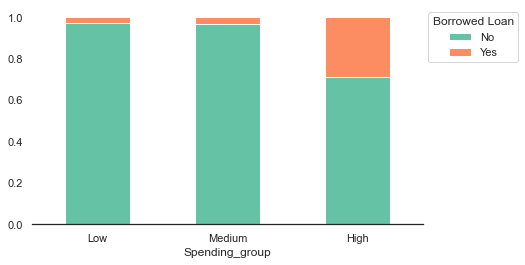

In [27]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(loan_df[variable])

### Observations

People with higher income had opted for personal loan before.

People with high mortgages opted for loan.

Customers with higher average monthly credit usage have opted for loan.

Customers with higher income had higher average credit card usage and mortgage.

Graduate and Advanced/Professional have higher monhtly credit card usage and have borrowed loans with the bank.

Lets review the target variable PersonalLoan

([<matplotlib.patches.Wedge at 0x272da1020d0>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

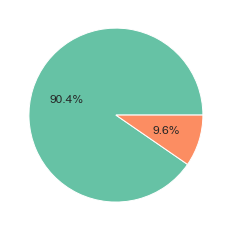

In [28]:
plt.pie(data=loan_df,x=loan_df["PersonalLoan"].value_counts(),autopct='%1.1f%%')

The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted for a personal loan in the dataset. 
This can be handled using weight or SMOTE. Lets explore that in next milestone.

## Summary

### Dataset Description:
Dependent variable is the Personal_loan which is of categorical data type.
Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
There were no missing values in the dataset.

### Data Preprocessing:
I observed that some observations where experience = -ve but since there was a strong correlation with age , dropped experience.
I have also created Age bin ,Spending group and Incomegroup to analyse in there is any pattern in buying loan based on these.

### Observations from EDA:
People with higher income had opted for personal loan before.

People with high mortgages opted for loan.

Customers will higher average monthly credit usage have opted for loan.

Customers with Family of 3 members had borrowed the loans with the bank.

Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.

Customers who had certificate of deposit with the bank had previously borrowed loan

Majority of customers who did have Personal loan with the bank used Online facilities.


### Preliminary Customer segmentation

Customer with Higher income have higher mortages and higher monthly average spending.They also have certificate of deposit with the bank.They are our high profile clients.

Few Customers in medium income group don't have higher mortages and have less average monthly credit card spending .They are average profile clients.

Customer in lower income group have less mortages( few outliers are there) ,less monthly spending. They are our low profile clients.

### Actions for data pre-processing:
Many variables have outliers that need to be treated.

Also few attributes can be dropped as some of them are redundant and few others are created for EDA such as Experience, Zipcode, Agebin, Income_group, Spending_group.

## Conclusion
From the initial EDA, this dataset does have sufficient information to begin modeling.
As per summary provided above, i would spend little more time on data preprocessing especially on outliers and dropping few attributes.
After that, I will begin my modeling. I also would explore more in dealing with the imblance dataset. I have few techniques in mind to increase the effiecetiveness of the dataset.
As mentioned in milestone2 and ince this is a classic classification problem, I will be using different models to predict.
 

## Milestone 4 - Model Building & Evaluation

#### Outlier Detection

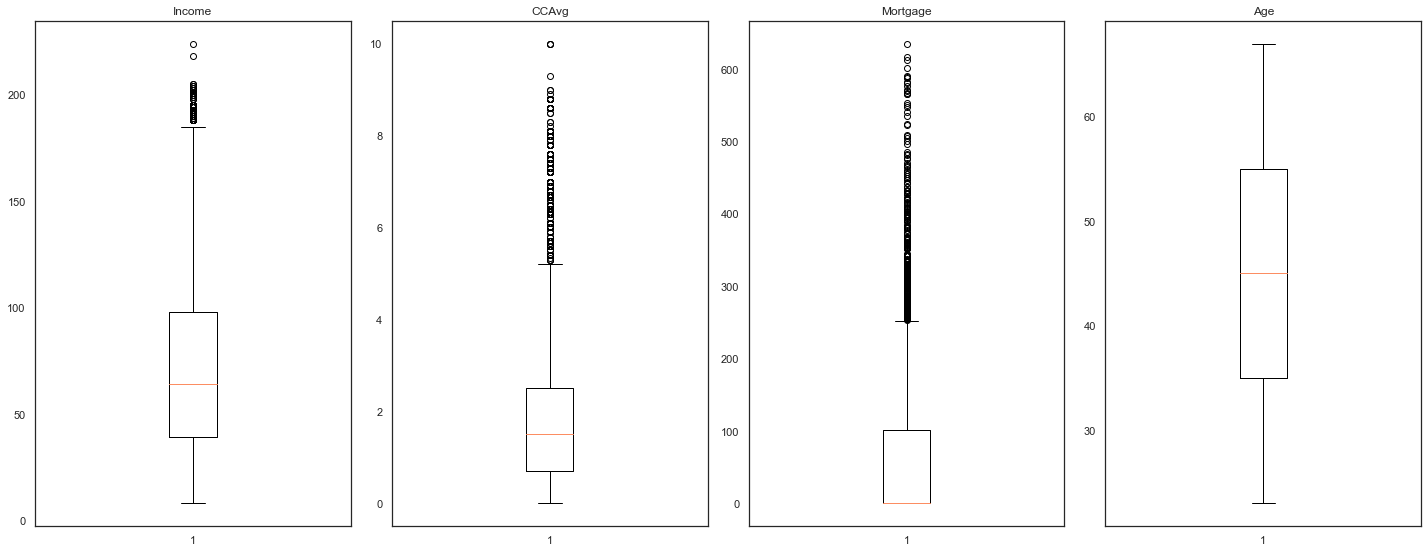

In [29]:
numeric_columns =['Income','CCAvg','Mortgage','Age']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(loan_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [30]:
df_loan=loan_df.copy()

In [31]:
# Check Income extreme values
df_loan.sort_values(by=["Income"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Agebin,Income_group,Spending_group
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,41-50,High,High
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0,41-50,High,High
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1,18-30,High,High
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0,41-50,High,High
4225,43,18,204,91902,2,8.80,1,0,0,0,0,1,0,41-50,High,High


In [32]:
df_loan.loc[(df_loan['Age']==48) & (df_loan['Experience']==24)].sort_values(by=['Income'],ascending=False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Agebin,Income_group,Spending_group
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,41-50,High,High
196,48,24,165,93407,1,5.00,1,0,0,0,0,0,1,41-50,High,High
2217,48,24,162,91355,4,3.30,2,446,1,0,1,1,0,41-50,High,High
4629,48,24,148,91311,2,3.30,1,0,0,0,1,1,1,41-50,High,High
4167,48,24,144,94025,4,3.50,2,0,1,0,0,0,0,41-50,High,High


In [33]:
# Check Mortgage extreme values
df_loan.sort_values(by=["Mortgage"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Agebin,Income_group,Spending_group
2934,37,13,195,91763,2,6.5,1,635,0,0,0,1,0,31-40,High,High
303,49,25,195,95605,4,3.0,1,617,1,0,0,0,0,41-50,High,High
4812,29,4,184,92126,4,2.2,3,612,1,0,0,1,0,18-30,High,Medium
1783,53,27,192,94720,1,1.7,1,601,0,0,0,1,0,51-60,High,Medium
4842,49,23,174,95449,3,4.6,2,590,1,0,0,0,0,41-50,High,High


In [34]:
# Check CCAVg extreme values
df_loan.sort_values(by=["CCAvg"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Agebin,Income_group,Spending_group
787,45,15,202,91380,3,10.0,3,0,1,0,0,0,0,41-50,High,High
2101,35,5,203,95032,1,10.0,3,0,1,0,0,0,0,31-40,High,High
2337,43,16,201,95054,1,10.0,2,0,1,0,0,0,1,41-50,High,High
3943,61,36,188,91360,1,9.3,2,0,1,0,0,0,0,60-100,High,High
3822,63,33,178,91768,4,9.0,3,0,1,0,0,0,0,60-100,High,High


This is some really extreme values in income 224K USD compared to same age group and experience. Values for Credit card and Mortages looks fine.After identifying outliers, we can decide whether to remove/treat them or not. It depends,here I am not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

In [35]:
#drop column which we don't need for modelling
df_loan.drop(columns=["Agebin", "ZIPCode",'Experience','Income_group','Spending_group'], inplace=True)

In [36]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Income             5000 non-null   int64   
 2   Family             5000 non-null   category
 3   CCAvg              5000 non-null   float64 
 4   Education          5000 non-null   category
 5   Mortgage           5000 non-null   int64   
 6   PersonalLoan       5000 non-null   category
 7   SecuritiesAccount  5000 non-null   category
 8   CDAccount          5000 non-null   category
 9   Online             5000 non-null   category
 10  CreditCard         5000 non-null   category
dtypes: category(7), float64(1), int64(3)
memory usage: 191.5 KB


We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies So we will only make dummies for Regions and Education.

In [37]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

oneHotCols=['Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [38]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [39]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

## Model building Logistic Regression
### Model evaluation criterion
Model can make wrong predictions as:
Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)
### Which case is more important?
The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.
### How to reduce losses?i.e need to reduce False Negatives ?
In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.
We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [40]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [41]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    X_train_df, X_test_df: Independent features
    y_train_pass,y_test_pass: Dependent variable
    statsklearn : 0 if calling for Sklearn model else 1
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores

In [42]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add scores to list so that we can compare all models score together'''   
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

### Logistic Regression (with Sklearn library)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.656  Test:  0.655
 Recall     : Train: 0.988  Test: 0.972
 Precision  : Train: 0.217  Test:  0.214
 F1         : Train: 0.355  Test: 0.351


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


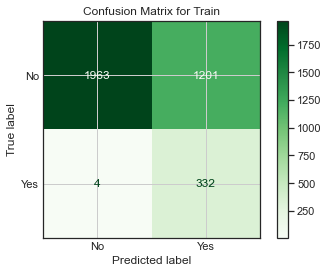

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


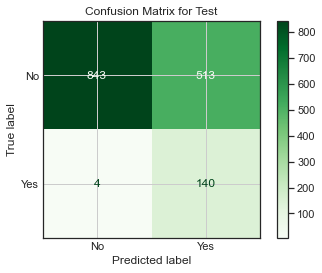

In [43]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,statmodel)

In [44]:
add_score_model(scores_Sklearn)

### Logistic Regression (with Statmodel)

Optimization terminated successfully.
         Current function value: 0.108646
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.961  Test:  0.958
 Recall     : Train: 0.693  Test: 0.66
 Precision  : Train: 0.873  Test:  0.872
 F1         : Train: 0.773  Test: 0.751


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


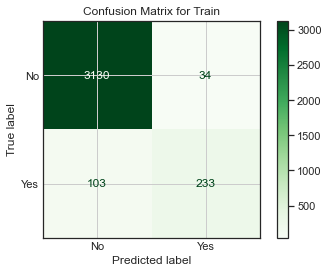

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


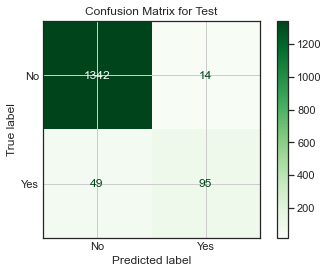

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.6564
Time:                        20:41:58   Log-Likelihood:                -380.26
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                4.623e-305
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3841      0.243    -22.186      0.000      -5.860      -4.908
Age                   0.2045      0.098      2.089      0.037       0.013       0.396
Income                3.1097      0.181     17.144      0.000       2.754       3.465
Family                0.7006      0.108      6.479      0.000       0.489       0.913
CCAvg                 0.1986      0.096      2.058      0.040       0.009       0.388
Mortgage              0.0991      0.075      1.320      0.187      -0.048       0.246
SecuritiesAccount    -0.3036      0.116     -2.609      0.009      -0.532      -0.076
CDAccount             0.9005      0.104      8.659      0.000       0.697       1.104
Online               -0.3596      0.101     -3.548      0.000      -0.558      -0.161
CreditCard           -0.4864      0.121     -4.008      0.000      -0.724      -0.249
Education_2           1.9967      0.155     12.920      0.000       1.694       2.300
Education_3           2.0708      0.157     13.189      0.000       1.763       2.379
=====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [45]:
# adding constant to training and test set
X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)
statmodel=1  #0 for sklearn and 1 for statmodel
logit = sm.Logit( y_train, X_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

# Let's check model performances for this model
scores_statmodel = get_metrics_score(lg,X_train_stat,X_test_stat,y_train,y_test,statmodel)
lg.summary() 

### Test Assumption
#### MultiCollinearity
we will have to check and remove multicollinearity from the data to get reliable coefficients and p-values. 
There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.* General Rule of thumb: If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables. Whereas if VIF exceeds 5, we say it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [46]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train_stat.astype(float).copy()

In [47]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                1.000000
Age                  1.013931
Income               1.815995
Family               1.048741
CCAvg                1.682429
Mortgage             1.049751
SecuritiesAccount    1.139074
CDAccount            1.329335
Online               1.042407
CreditCard           1.105165
Education_2          1.247656
Education_3          1.237793
dtype: float64



Observations: There is no correlation between predicator variables

In this case 'Regions' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.

In [48]:
logit1 = sm.Logit(y_train, X_train_stat.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()

Optimization terminated successfully.
         Current function value: 0.108646
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.6564
Time:                        20:41:58   Log-Likelihood:                -380.26
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                4.623e-305
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3841      0.243    -22.186      0.000      -5.860      -4.908
Age                   0.2045      0.098      2.089      0.037       0.013       0.396
Income                3.1097      0.181     17.144      0.000       2.754       3.465
Family                0.7006      0.108      6.479      0.000       0.489       0.913
CCAvg                 0.1986      0.096      2.058      0.040       0.009       0.388
Mortgage              0.0991      0.075      1.320      0.187      -0.048       0.246
SecuritiesAccount    -0.3036      0.116     -2.609      0.009      -0.532      -0.076
CDAccount             0.9005      0.104      8.659      0.000       0.697       1.104
Online               -0.3596      0.101     -3.548      0.000      -0.558      -0.161
CreditCard           -0.4864      0.121     -4.008      0.000      -0.724      -0.249
Education_2           1.9967      0.155     12.920      0.000       1.694       2.300
Education_3           2.0708      0.157     13.189      0.000       1.763       2.379
=====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The Pvalue for Mortgage is 0.187 So droping Mortage

In [49]:
X_train1=X_train_stat.copy()
X_test1=X_test_stat.copy()

In [50]:
 X_train2 = X_train1.drop(['Mortgage'], axis = 1)
 X_test2= X_test1.drop(['Mortgage'], axis = 1)
 logit2 = sm.Logit(y_train, X_train2.astype(float))
 lg2 = logit2.fit()
 lg2.summary()

Optimization terminated successfully.
         Current function value: 0.108894
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Tue, 17 May 2022   Pseudo R-squ.:                  0.6556
Time:                        20:41:58   Log-Likelihood:                -381.13
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                8.857e-306
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3757      0.242    -22.213      0.000      -5.850      -4.901
Age                   0.1988      0.098      2.035      0.042       0.007       0.390
Income                3.1263      0.181     17.282      0.000       2.772       3.481
Family                0.7038      0.108      6.508      0.000       0.492       0.916
CCAvg                 0.1871      0.096      1.946      0.052      -0.001       0.375
SecuritiesAccount    -0.3075      0.116     -2.648      0.008      -0.535      -0.080
CDAccount             0.9089      0.104      8.749      0.000       0.705       1.113
Online               -0.3561      0.101     -3.522      0.000      -0.554      -0.158
CreditCard           -0.4887      0.121     -4.035      0.000      -0.726      -0.251
Education_2           1.9877      0.154     12.899      0.000       1.686       2.290
Education_3           2.0648      0.157     13.174      0.000       1.758       2.372
=====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

CCavg is important parameter as per EDA so not dropping it

 MODEL PERFORMANCE
 Accuracy   : Train: 0.961  Test:  0.957
 Recall     : Train: 0.702  Test: 0.653
 Precision  : Train: 0.861  Test:  0.862
 F1         : Train: 0.774  Test: 0.743


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


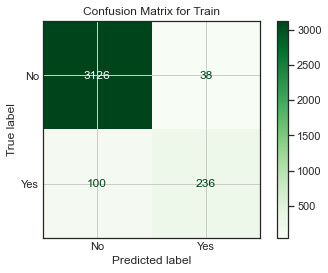

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


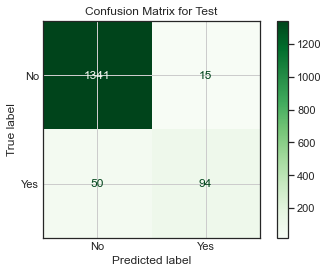

In [51]:
# Let's check model performances for this model

scores_statmodel = get_metrics_score(lg2,X_train2,X_test2,y_train,y_test,statmodel)
add_score_model(scores_statmodel)

### Roc -Auc curve on Train data

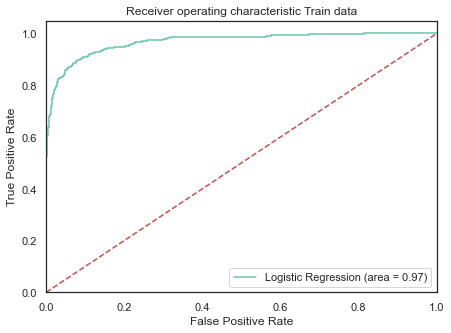

In [52]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Train data')
plt.legend(loc="lower right")
plt.show()

### Roc -Auc curve on Test data

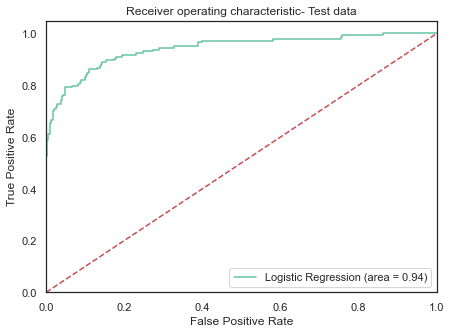

In [53]:
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- Test data')
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a generalized performance on training and test set.
ROC-AUC score of 0.97 on training 0.94 on test set is quite good.

### Coefficient interpretations
Coefficient of Income, Education, Family,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
Coefficient of Securities account,online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.
### Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [54]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg2.params, columns=['coef'])
lgcoef.loc[:, "Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef['Probability'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])
lgcoef['Percentage Change of Odds']=(np.exp(lg2.params)-1)*100
lgcoef['pval']=lg2.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by="Odds Ratio", ascending=False)
lgcoef

,coef,Odds Ratio,Probability,Percentage Change of Odds,pval
Income,3.13,22.79,0.96,2179.03,0.00
Education_3,2.06,7.88,0.89,688.39,0.00
Education_2,1.99,7.30,0.88,629.91,0.00
CDAccount,0.91,2.48,0.71,148.17,0.00
Family,0.70,2.02,0.67,102.15,0.00
Age,0.20,1.22,0.55,21.99,0.04
CCAvg,0.19,1.21,0.55,20.57,0.05
SecuritiesAccount,-0.31,0.74,0.42,-26.47,0.01
Online,-0.36,0.70,0.41,-29.96,0.00
CreditCard,-0.49,0.61,0.38,-38.66,0.00


Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 22 times or a 96% chance of a customer taking personal loan.

Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 2.02 times increase in the odds of a customer taking personal loan.

CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.21 times or a 22.16% increase in the odds of a customer taking personal loan.

Education Advance has 7 times higher chances of taking a personal loan than undergraduate Interpretation for other attributes can be done similarly.

Most overall significant varaibles are Income,Education, CD account ,Family, Age and CCAvg

### Model performance evaluation and improvement

 MODEL PERFORMANCE
 Accuracy   : Train: 0.961  Test:  0.957
 Recall     : Train: 0.702  Test: 0.653
 Precision  : Train: 0.861  Test:  0.862
 F1         : Train: 0.774  Test: 0.743


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


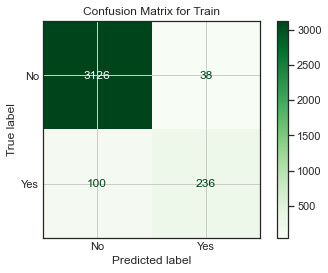

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


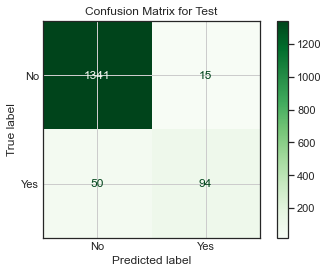

In [55]:
# Let's check model performances for this model
scores_LR = get_metrics_score(lg2,X_train2,X_test2,y_train,y_test,statmodel)

## Insights:

### True Positives:

Reality: A customer wanted to take personal Loan. Model Prediction: The customer will take personal loan. Outcome: The model is good.

### True Negatives:

Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. Outcome: The business is unaffected .

### False Positives :

Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.

### False Negatives:

Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.

### Right Metric to use:
Here not able to identify a potential customer is the biggest loss we can face. Hence, Recall is the right metric to check the performance of the model .We have recall as 70 on train and 65 on test. False negative are 100 and 50 on train and test. We can further improve this score using Optimal threshold for ROC AUC curve and precision recall curve

## Optimal threshold using AUC-ROC curve¶

In [56]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
#fpr, tpr, thresholds = metrics.roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.0847456068057212


 MODEL PERFORMANCE
 Accuracy   : Train: 0.899  Test:  0.887
 Recall     : Train: 0.911  Test: 0.854
 Precision  : Train: 0.486  Test:  0.452
 F1         : Train: 0.634  Test: 0.591


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


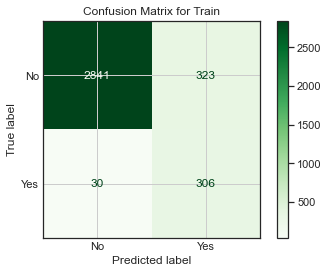

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


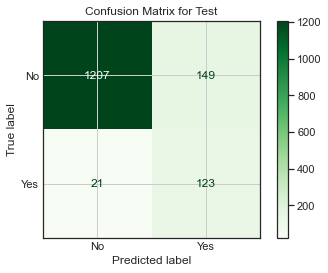

 ROC-AUC Score  :Train::  0.904  Test::  0.872


In [57]:
scores_statmodel = get_metrics_score(lg2,X_train2,X_test2,y_train,y_test,statmodel,threshold=optimal_threshold_auc_roc,roc=True)
add_score_model(scores_statmodel)

With 0.091 Threshold the Recall score has improved from 65% to 87% on test data with 89% accuracy. Also False negative values has decreased to 21 from 50 for testdata. ROC-AUC score is 87 which is good.

Let's use Precision-Recall curve and see if we can find a better threshold

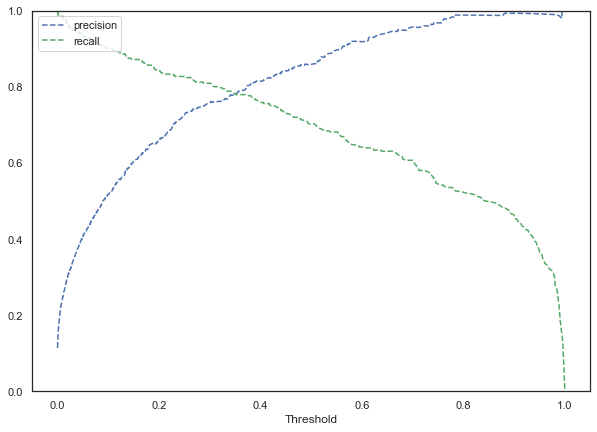

In [58]:
y_scores=lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 MODEL PERFORMANCE
 Accuracy   : Train: 0.957  Test:  0.942
 Recall     : Train: 0.81  Test: 0.729
 Precision  : Train: 0.76  Test:  0.686
 F1         : Train: 0.784  Test: 0.707


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


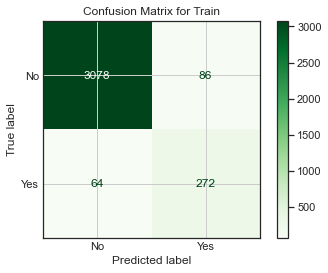

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


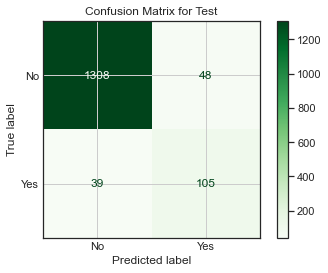

 ROC-AUC Score  :Train::  0.891  Test::  0.847


In [59]:
optimal_threshold_curve = 0.3

scores_opt_curve = get_metrics_score(lg2,X_train2,X_test2,y_train,y_test,statmodel,threshold=optimal_threshold_curve,roc=True)
add_score_model(scores_opt_curve)

With this model the False negative cases have gone up and recall for test is 72 with 95 % accuracy. Model is performing well on training and test set. Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used. Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

## Using Sequential Feature Selection

In [60]:
X_train_seq=X_train_stat
X_test_seq=X_test_stat

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin
X_train_seq.shape

(3500, 12)

In [62]:
statmodel=0  #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 12,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2022-05-17 20:42:02] Features: 1/12 -- score: 0.9940298507462686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.7s finished

[2022-05-17 20:42:03] Features: 2/12 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished

[2022-05-17 20:42:03] Features: 3/12 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [63]:
statmodel=0  #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 11,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2022-05-17 20:42:08] Features: 1/11 -- score: 0.9940298507462686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.7s finished

[2022-05-17 20:42:09] Features: 2/11 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished

[2022-05-17 20:42:10] Features: 3/11 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [64]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [65]:
X_train_seq.columns[feat_cols]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard', 'Education_2', 'Education_3'],
      dtype='object')

Now we will fit a sklearn model using these features only

In [66]:
X_train_final = X_train_seq[X_train_seq.columns[feat_cols]]
X_test_final = X_test_seq[X_train_final.columns]

 MODEL PERFORMANCE
 Accuracy   : Train: 0.66  Test:  0.664
 Recall     : Train: 0.985  Test: 0.972
 Precision  : Train: 0.218  Test:  0.219
 F1         : Train: 0.358  Test: 0.357


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


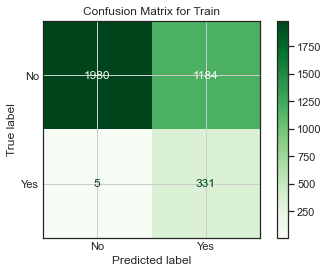

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


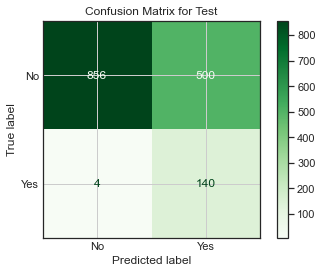

In [67]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train_final,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_sfs = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,statmodel)
add_score_model(scores_sfs)

In [68]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model- Sklearn',
                                          'Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.092',
                                          'Logistic Regression - Optimal threshold = 0.3',
                                          'Logistic Regression - Sequential feature selection'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    
    
                                       

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model- Sklearn,0.66,0.66,0.99,0.97,0.22,0.21,0.36,0.35
1,Logistic Regression Model - Statsmodels,0.96,0.96,0.70,0.65,0.86,0.86,0.77,0.74
2,Logistic Regression - Optimal threshold = 0.092,0.90,0.89,0.91,0.85,0.49,0.45,0.63,0.59
3,Logistic Regression - Optimal threshold = 0.3,0.96,0.94,0.81,0.73,0.76,0.69,0.78,0.71
4,Logistic Regression - Sequential feature selec...,0.66,0.66,0.99,0.97,0.22,0.22,0.36,0.36


Since we want higher Recall with higher accuracy Optimal Threshold 0.3 seems to be a good choice. Lets explore a model with decison tree if this score can be improved further.

## Model building Decision Tree
Data preparation

Partition the data into train and test set.

Built a CART model on the train data.

Tune the model and prune the tree, if required.

Test the data on test set.

In [69]:
#drop column which we don't need for modelling
loan_df.drop(columns=["Agebin", "ZIPCode",'Experience','Income_group','Spending_group'], inplace=True)

In [70]:
X_dt = loan_df.drop('PersonalLoan', axis=1)
y_dt = loan_df['PersonalLoan']

In [71]:
#oneHotCols=['Regions']
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

### Build Model
We are using 'gini' criteria to split.
If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

Since not being able to identify a potential customer is the biggest loss as mentioned earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

In [72]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))
    make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict,"Confusion Matric on Test Data")

 Accuracy : Train : 1.0  Test: 0.9786666666666667
 Recall   : Train : 1.0  Test: 0.875


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


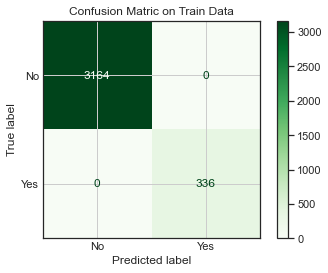

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


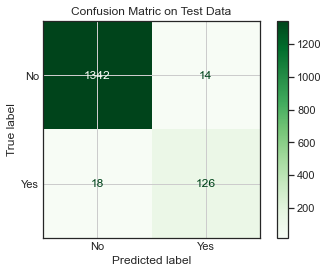

In [73]:
#since data is imbalanced adding weights
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)

Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted

## Visualizing the Decision Tree¶

In [74]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1']


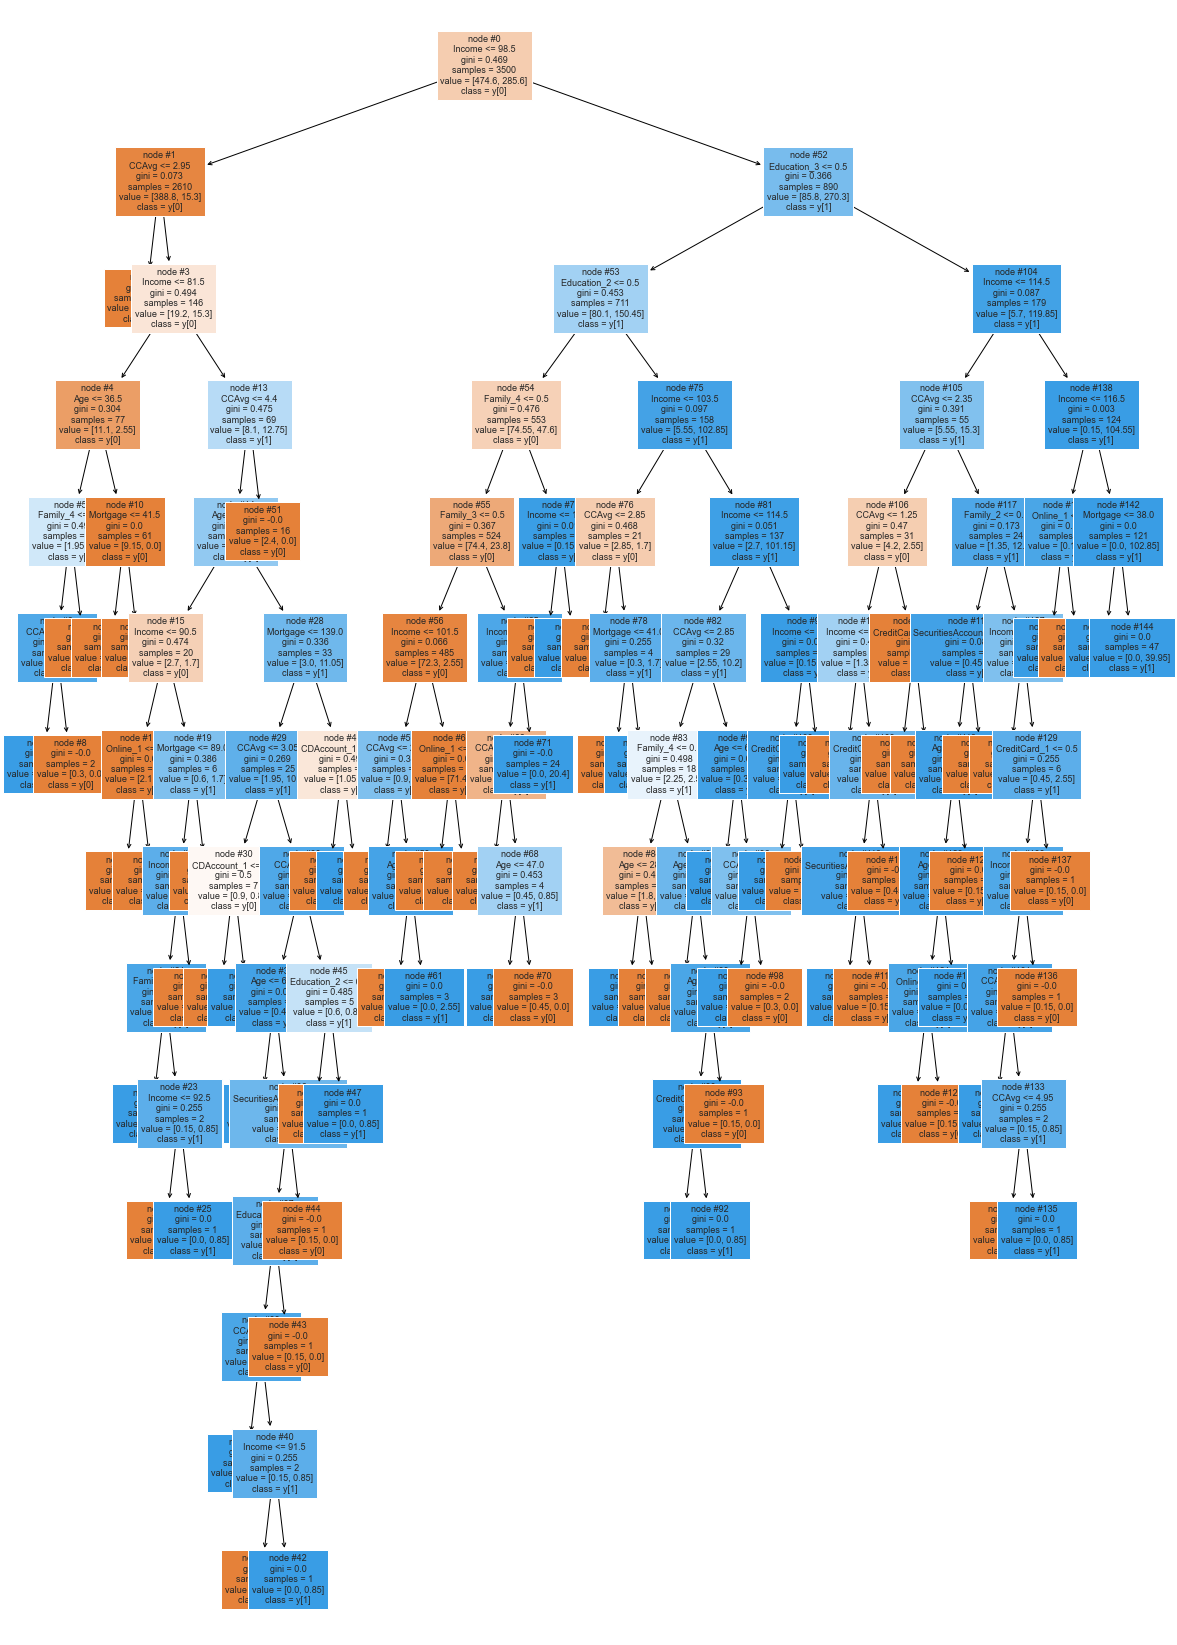

In [75]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [76]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Mortgage <= 41.50
|   |   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |   |   |--- Mortgage >  41.50
|   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- Online_1 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |   |--- Onli

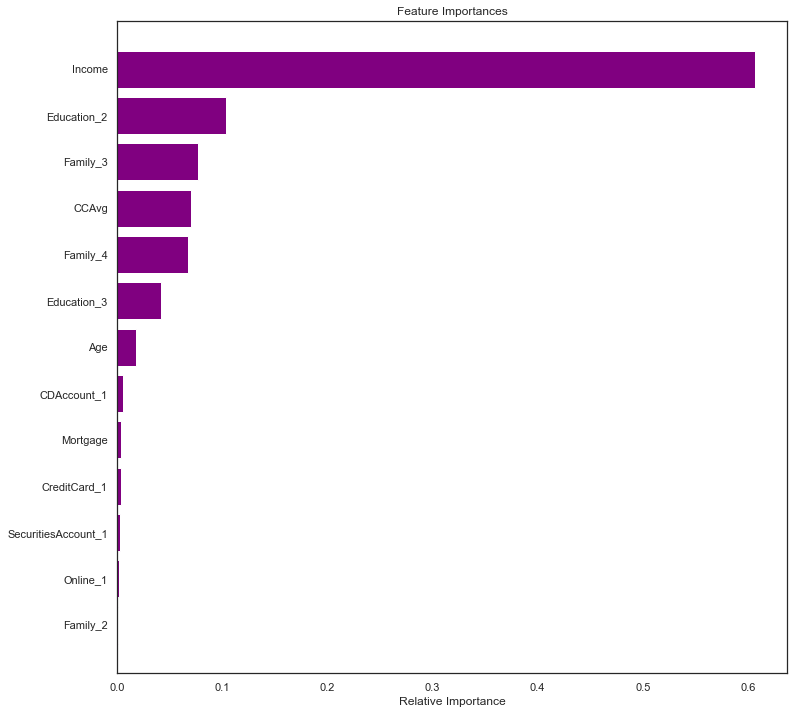

In [77]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Using GridSearch for Hyperparameter tuning of our tree model

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

It is an exhaustive search that is performed on a the specific parameter values of a model.

The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Let's see if we can improve our model performance even more.

In [78]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=30, min_samples_leaf=5,
                       random_state=1)

In [79]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

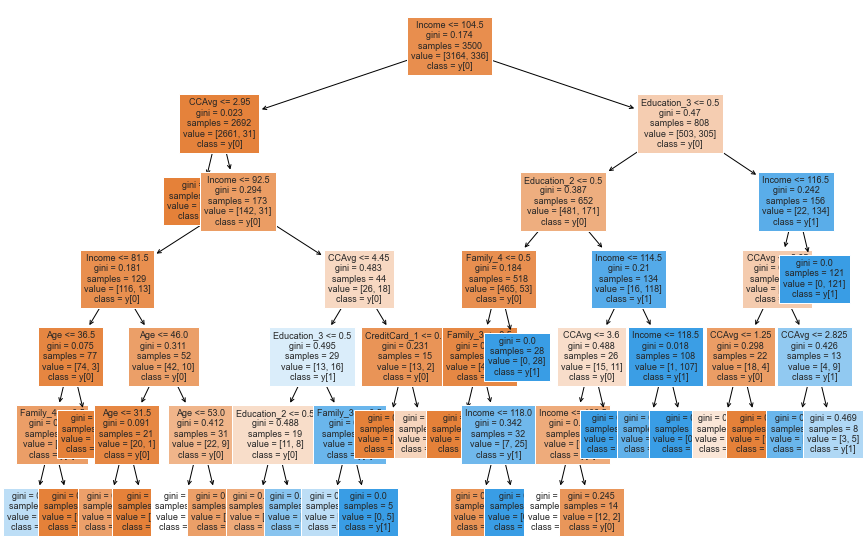

In [80]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

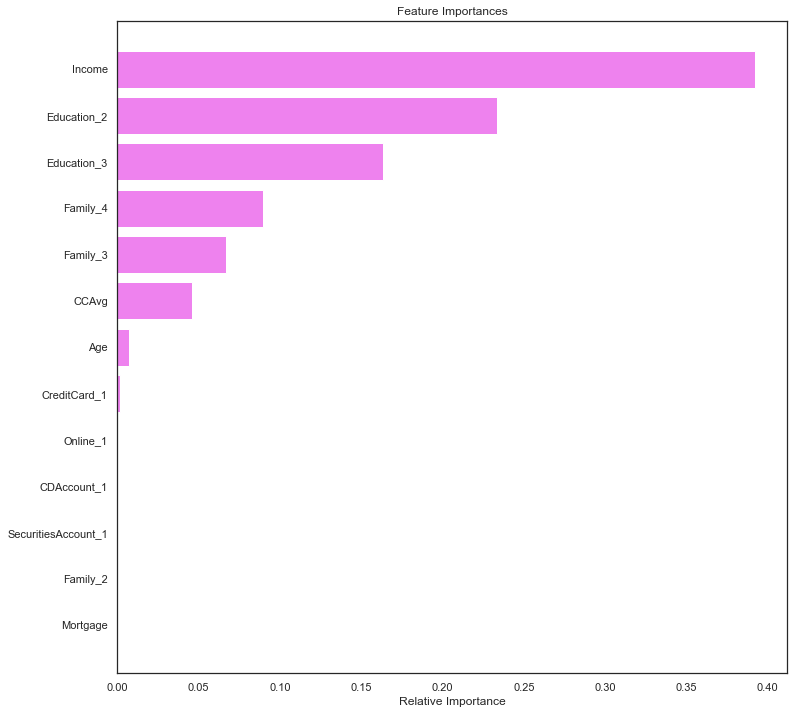

In [81]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.9897142857142858  Test: 0.9793333333333333
 Recall   : Train : 0.9255952380952381  Test: 0.8611111111111112


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


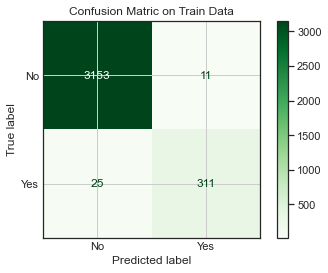

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


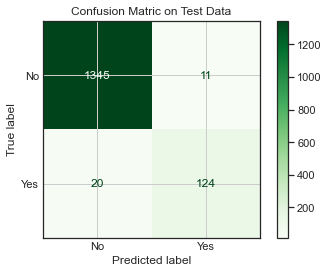

In [82]:
get_recall_score(estimator)

With HyperParameter max_depth=6, max_leaf_nodes=20, min_samples_leaf=7 the overfitting on train has reduced, but the recall for test has not improved.

Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.

But the recall metric is still 91 and false negatives are 12.We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.

### Cost Complexity Pruning

In [83]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

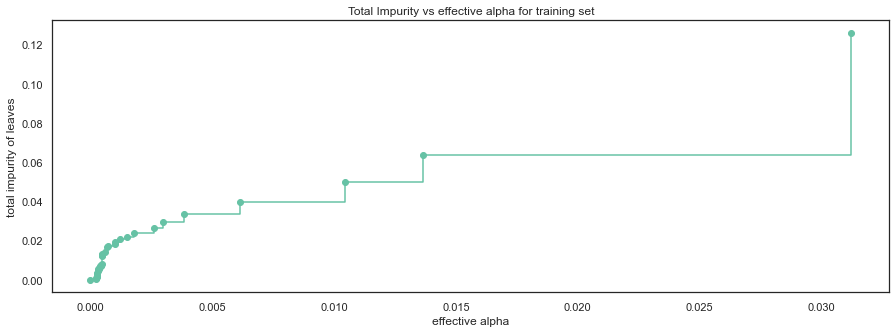

In [84]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [85]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train_dt, y_train_dt)
    y_train_pred=clf.predict(X_train_dt)
    y_test_pred=clf.predict(X_test_dt)
    accuracy_train.append(clf.score(X_train_dt,y_train_dt))
    accuracy_test.append(clf.score(X_test_dt,y_test_dt))
    recall_train.append(metrics.recall_score(y_train_dt,y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt,y_test_pred))
    clfs.append(clf)

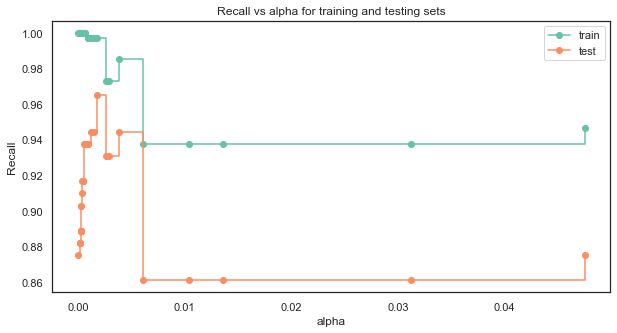

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We are gettingt a higher recall on test data between 0.002 to 0.005. Will choose alpha as 0.002.

Creating model with 0.002 ccp_alpha

In [87]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9768571428571429  Test: 0.9686666666666667
 Recall   : Train : 0.9880952380952381  Test: 0.9583333333333334


C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


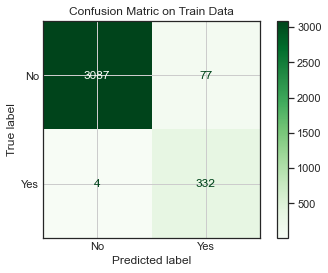

C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


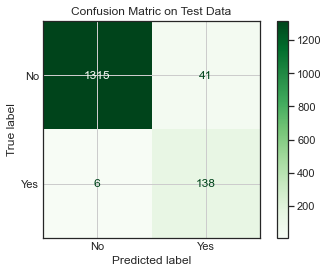

In [88]:
get_recall_score(best_model)

The Recall on train and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.

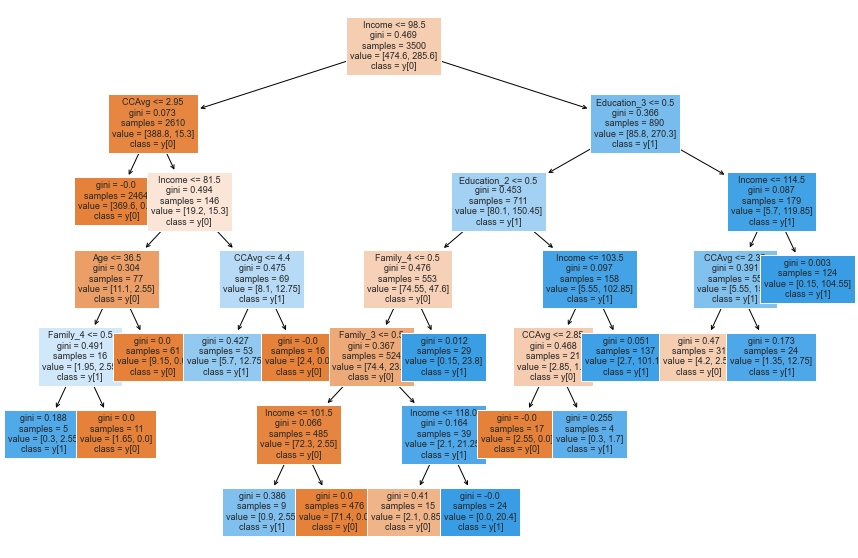

In [89]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [90]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 12.75] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.40, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 101.50
|   |   |   |   |   |   |--- weights: [0.90, 2.55] class: 1
|   |   |   |   |   |--- Income >  101.50
|   |   |   |   |   |   |--- weights: [71.40, 0.00] class: 0
| 

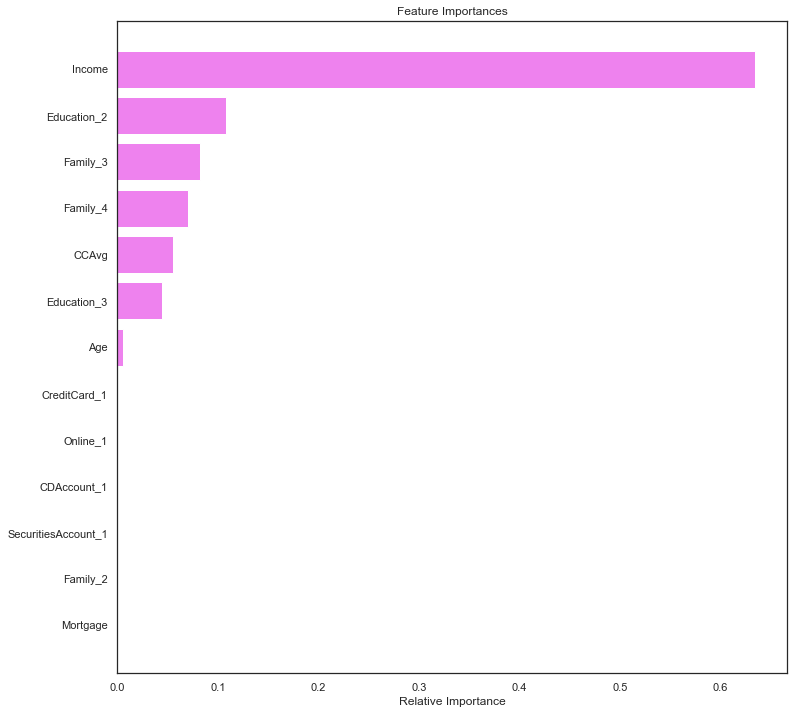

In [91]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We are getting a higher recall on test data between 0.002 to 0.005. Will choosed alpha as 0.002.

The Recall on train and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.

Important features : Income, Graduate education, Family member 3 and 4, Ccavg, Advanced education, Age.

This is the best model as false negative is only 6 on Testdata.

### Comparing all the models based on Model Performance¶

In [92]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall
0,Logisitic Regression with Optimal Threshold 0.104,0.92,0.91,0.90,0.88
1,Initial decision tree model,1.00,0.98,1.00,0.86
2,Decision treee with hyperparameter tuning,0.99,0.98,0.92,0.84
3,Decision tree with post-pruning,0.98,0.97,0.98,0.96


Decision tree model post pruning has given us best recall scores on data with 97% accuracy . Exploratory data analysis also suggested income and education were important features in deciding if person will borrow personal loan. so choosing Decision Tree with post-pruning for our prediction.

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1356
           1       0.77      0.96      0.85       144

    accuracy                           0.97      1500
   macro avg       0.88      0.96      0.92      1500
weighted avg       0.97      0.97      0.97      1500



C:\Users\Supraja\AppData\Local\Temp/ipykernel_20320/2685643184.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None,axis='both',which='both',visible=False)


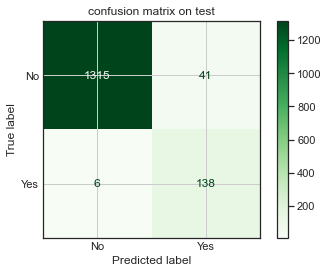

In [93]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(y_test_dt,y_pred))
make_confusion_matrix(y_test,y_pred,"confusion matrix on test")

#### Observation

After Post Pruning ,the false negative has reduced to 6.The accuracy on test data is 97% & Recall is 97% after choosing optimal cc-alpha.

## Conclusion
We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.

First we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income,Education, CD account ,Family and CCAvg .

Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan

Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.

We also improved the performance using ROC-AUC curve and optimal threshold .This was best model with high recall and accuracy .

Decision tree can easily overfit. They require less datapreprocessing compared to logistic Regression and are easy to understand.

We used decision trees with prepruning and post pruning. The Post pruning model gave 96 % recall with 97% accuracy.

Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.

### Actionable Insights & Recommendations

#### Misclassification Analysis

In [94]:
misclass_df = X_test_dt.copy()

In [95]:
misclass_df['Actual']=y_test_dt
misclass_df['Predicted'] = y_pred

([<matplotlib.patches.Wedge at 0x272db0c36a0>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

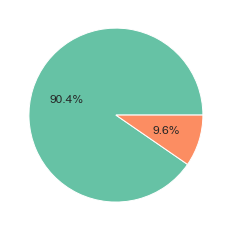

In [96]:
plt.pie(data=misclass_df,x=misclass_df["Actual"].value_counts(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x272da34d3d0>,
 [Text(-1.023599997039702, 0.40279404918682976, ''),
  Text(1.0236000064677768, -0.40279402522774294, '')],
 [Text(-0.5583272711125646, 0.21970584501099802, '88.1%'),
  Text(0.5583272762551509, -0.2197058319424052, '11.9%')])

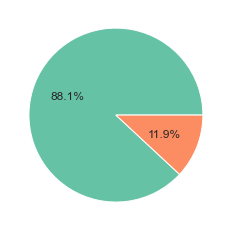

In [97]:
plt.pie(data=misclass_df,x=misclass_df["Predicted"].value_counts(),autopct='%1.1f%%')

Percentage of value predicted by our model has been very close to the actual values. Lets find out False Negative and False Positive observations

In [98]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],margins=True)

Actual,0,1,All
Predicted,,,
0,1315,6,1321
1,41,138,179
All,1356,144,1500


<AxesSubplot:xlabel='Predicted'>

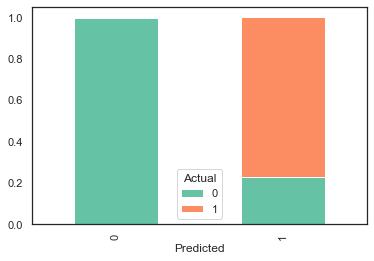

In [99]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],normalize='index').plot(kind='bar',stacked=True)

In [100]:
# Rows that were classified as Negative when they were actually positive
fn_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]

In [102]:
False_negative= loan_df[loan_df.index.isin(fn_rows.index.values)].copy()
False_negative

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
1069,44,75,2,3.50,1,0,1,0,0,1,0
1126,32,104,2,3.70,1,0,1,0,0,0,1
1518,43,64,4,3.00,3,221,1,0,0,1,0
2361,36,109,3,0.50,3,0,1,1,1,1,0
2623,42,111,3,3.00,1,0,1,1,1,0,1
2996,42,103,1,3.33,1,0,1,1,1,1,1


Our model predicted 6 customers wrongly. On analyzing the Income , Education,Family , we can see the income is not in range of High income group and education is undergrad for most of them and there average spending is also low. These cases are some exceptions.

In [104]:
# Rows that were classified as postive when they were actually negative
fp_rows = misclass_df[(misclass_df['Actual'] == 0) & (misclass_df['Predicted'] == 1)]
fp_rows
False_Positive= loan_df[loan_df.index.isin(fp_rows.index.values)].copy()
False_Positive

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
10,65,105,4,2.40,3,0,0,0,0,0,0
82,41,82,1,4.00,3,0,0,0,0,1,0
185,39,115,1,1.00,3,0,0,0,0,1,0
553,52,101,2,0.30,1,0,0,0,0,0,0
585,34,83,4,4.00,3,0,0,0,0,1,0
697,42,85,1,3.70,3,0,0,0,0,1,0
746,62,85,4,3.40,2,0,0,0,0,1,0
792,41,98,1,4.00,3,0,0,0,0,0,1
916,44,85,2,3.20,1,0,0,0,0,1,0
1045,43,84,1,4.00,3,0,0,0,0,0,0


On analyzing the Education , we can see most of them have education as Advance or Graduate . These cases are some exceptions.

#### Recommendation
Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.

Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important factor.

Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.

So for this campaign we can have different profiles for customers.

High Profile Clients :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending

Average Profile :- Medium income group,Graduate level education.3/4Family members,medium spending

Low Profile:-Lower income group,undergrads ,3/4Family Member,low spending

Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.

We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.

Prequalifying for Loan can also attract more customers.

Our 2nd target would be Medium profile customers.

The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.